In [79]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [80]:
df = pd.read_csv(r"E:\Data Science by SRK\Machine_learning\Classification\Diabetes\cleaned_dataset_diabetes.csv")

In [81]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66.0,23.0,1.460250,28.1,0.861443,1.288798,0
1,0,137.0,40.0,35.0,1.532648,43.1,1.071407,1.338267,1
2,3,78.0,50.0,32.0,1.452246,31.0,0.890303,1.311941,1
3,2,197.0,70.0,45.0,1.690052,30.5,0.857475,1.392162,1
4,1,189.0,60.0,23.0,1.753669,30.1,0.926098,1.404659,1
...,...,...,...,...,...,...,...,...,...
387,0,181.0,88.0,44.0,1.681244,43.3,0.882124,1.311941,1
388,1,128.0,88.0,39.0,1.479504,36.5,1.004630,1.351088,1
389,2,88.0,58.0,26.0,1.259921,28.4,0.978030,1.293804,0
390,10,101.0,76.0,48.0,1.541485,32.9,0.863144,1.412359,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    float64
 8   Outcome                   392 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 27.7 KB


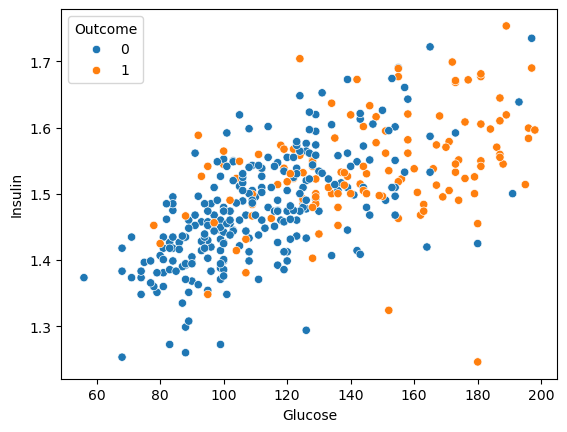

In [83]:
sns.scatterplot(x = 'Glucose', y = 'Insulin', hue = 'Outcome', data = df)
plt.show()

In [84]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# X & y

In [85]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

# Train_Test_split


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = True)

# Scaling data

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train.iloc[:, 1 : 8] = scaler.fit_transform(X_train.iloc[:, 1 : 8])
X_test.iloc[:, 1 : 8] = scaler.transform(X_test.iloc[:, 1 : 8])

# Hyper parameter tuning for KNN Classifier

In [88]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors' : list(range(1,100))}

from sklearn.model_selection import GridSearchCV
cv_classifier = GridSearchCV(estimator, param_grid, cv = 5, scoring = 'accuracy')

cv_classifier.fit(X_train, y_train)

cv_classifier.best_params_

{'n_neighbors': 13}

# KNN Model With Best Hyper parameters

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)

#prediction
ypred_train = knn.predict(X_train)
ypred_test = knn.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print("Train accuracy : ", accuracy_score(y_train, ypred_train))
print("Test accuracy : ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("Cross_val_score : ", cross_val_score(knn, X, y, cv= 5).mean())



Train accuracy :  0.7987220447284346
Test accuracy :  0.7341772151898734
Cross_val_score :  0.7679974034404414


# Confusion metrics

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred_test)

array([[43, 12],
       [ 9, 15]], dtype=int64)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        55
           1       0.56      0.62      0.59        24

    accuracy                           0.73        79
   macro avg       0.69      0.70      0.70        79
weighted avg       0.74      0.73      0.74        79



# Prediction new data

In [92]:
import pandas as pd


test_data = pd.DataFrame({
    'Pregnancies': [1],
    'Glucose': [89.0],
    'BloodPressure': [66.0],
    'SkinThickness': [23.0],
    'Insulin': [1.460250],
    'BMI': [28.1],
    'DiabetesPedigreeFunction': [0.861443],
    'Age': [1.288798],
# no outcome column used because its calculate only X_test data  :  'Outcome': [0]  
})

test_data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,89.0,66.0,23.0,1.46025,28.1,0.861443,1.288798


# use KNN Model to predict new data

In [93]:
knn.predict(test_data)

array([1], dtype=int64)